# TMDB Movie Data Analysis using Pandas and APIs

### Setup and Imports


In [1]:
import sys
sys.path.append('..')
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


### Step 1: Fetch Movie Data from API


In [2]:
from src.extraction import fetch_data
df_movie = fetch_data.fetch_movie_data()

2026-01-07 17:19:57,889 - INFO - src.extraction.fetch_data - Starting fetch_data.py script


2026-01-07 17:19:57,920 - INFO - src.extraction.fetch_data - API key loaded successfully
2026-01-07 17:19:57,922 - INFO - src.extraction.fetch_data - Starting to fetch data for 18 movies
2026-01-07 17:19:58,775 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 299534
2026-01-07 17:19:59,569 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 19995
2026-01-07 17:20:00,263 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 140607
2026-01-07 17:20:01,062 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 299536
2026-01-07 17:20:01,967 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 597
2026-01-07 17:20:02,669 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 135397
2026-01-07 17:20:03,475 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 420818
2026-01-07 17:20:04,236 - INFO - src.extraction.fetch_data - Successfully fetched movie ID 24428
2026-01-07 17:20:04,933 - INFO - s

### Store data as a Pandas DataFrame


In [3]:
# check if data is loaded correctly
df_movie['id']

df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  18 non-null     bool   
 1   backdrop_path          18 non-null     object 
 2   belongs_to_collection  16 non-null     object 
 3   budget                 18 non-null     int64  
 4   genres                 18 non-null     object 
 5   homepage               18 non-null     object 
 6   id                     18 non-null     int64  
 7   imdb_id                18 non-null     object 
 8   origin_country         18 non-null     object 
 9   original_language      18 non-null     object 
 10  original_title         18 non-null     object 
 11  overview               18 non-null     object 
 12  popularity             18 non-null     float64
 13  poster_path            18 non-null     object 
 14  production_companies   18 non-null     object 
 15  producti

In [4]:
df_movie.columns  # check column names

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'origin_country', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'credits'],
      dtype='object')

### End of Step 1: Fetch Movie Data from API

# Step 2: Data Cleaning and Preprocessing


In [5]:
from src.transformation import process
df_movie = process.dataframe_info(df_movie)

2026-01-07 17:20:12,148 - INFO - src.transformation.process - Starting process.py script
2026-01-07 17:20:12,242 - INFO - src.transformation.process - Loaded raw data from c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\transformation\../../data/raw\movies.json with 18 rows
2026-01-07 17:20:12,252 - INFO - src.transformation.process - Dropped irrelevant columns: ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
2026-01-07 17:20:12,257 - INFO - src.transformation.process - Extracted and cleaned JSON-like columns: ['belongs_to_collection', 'genres', 'spoken_languages', 'production_countries', 'production_companies', 'credits']
2026-01-07 17:20:12,268 - INFO - src.transformation.process - Converted column data types
2026-01-07 17:20:12,296 - INFO - src.transformation.process - Filtered to 18 released movies
2026-01-07 17:20:12,341 - INFO - src.transformation.process - process.py completed successfully in 0.19 seconds


 Converting Data Types...

New Data Types:
backdrop_path                    object
belongs_to_collection            object
budget                            int64
genres                           object
id                                int64
origin_country                   object
original_language                object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                           int64
runtime                           int64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                        int64
credits                          object
dtype: object

Sample Data Check (First 5 rows):
                          ti

In [10]:
from src.transformation import analysis
# Re-calculate KPI
df_movie['profit_musd'] = df_movie['revenue_musd'] - df_movie['budget_musd']
df_movie['roi'] = df_movie['revenue_musd'] / df_movie['budget_musd']


# 1. Highest Revenue
analysis.print_ranking("Highest Revenue", df_movie, 'revenue_musd')

# 2. Highest Budget
analysis.print_ranking("Highest Budget", df_movie, 'budget_musd')

# 3. Highest Profit
analysis.print_ranking("Highest Profit", df_movie, 'profit_musd')

# 4. Lowest Profit
analysis.print_ranking("Lowest Profit", df_movie, 'profit_musd', ascending=True)



# 5. Highest ROI (Budget >= 10M)
high_budget_mask = df_movie['budget_musd'] >= 10
analysis.print_ranking("Highest ROI (Budget >= 10M)", df_movie[high_budget_mask], 'roi')

# 6. Lowest ROI (Budget >= 10M)
analysis.print_ranking("Lowest ROI (Budget >= 10M)",
              df_movie[high_budget_mask], 'roi', ascending=True)

# 7. Most Voted Movies
analysis.print_ranking("Most Voted Movies", df_movie, 'vote_count',
              cols_to_show=['title', 'vote_count', 'vote_average'])


 Highest Revenue 
 title  budget_musd  revenue_musd  profit_musd       roi  vote_average
Avatar        237.0   2923.706026  2686.706026 12.336312         7.599

Highest Revenue
| title   |   budget_musd |   revenue_musd |   profit_musd |     roi |   vote_average |
|---------|---------------|----------------|---------------|---------|----------------|
| Avatar  |           237 |        2923.71 |       2686.71 | 12.3363 |          7.599 |

 Highest Budget 
            title  budget_musd  revenue_musd  profit_musd      roi  vote_average
Avengers: Endgame        356.0     2799.4391    2443.4391 7.863593         8.237

Highest Budget
| title             |   budget_musd |   revenue_musd |   profit_musd |     roi |   vote_average |
|-------------------|---------------|----------------|---------------|---------|----------------|
| Avengers: Endgame |           356 |        2799.44 |       2443.44 | 7.86359 |          8.237 |

 Highest Profit 
 title  budget_musd  revenue_musd  profit_musd    

2. Evaluate JSON-like columns
3. Extract and clean key data points
4. Inspect extracted columns using value_counts() to identify anomalies.


### Handling Missing & Incorrect Data

5. Convert Column datatypes


6. Replace unrealistic values


### Reorder & Finalize DataFrame

10. Reorder columns
11. reset Index


### End of Step 2

# Step 3: KPI Implementation & Analysis

Identify the Best/Worset Performing Movies


In [7]:
from src.transformation import analysis

In [8]:
# Profit = Revenue - Budget
df_movie['profit_musd'] = df_movie['revenue_musd'] - df_movie['budget_musd']

# ROI = Revenue / Budget
df_movie['roi'] = df_movie['revenue_musd'] / df_movie['budget_musd']

print("KPIs Calculated: ")

# RANKING LOGIC
def print_ranking(title, df, sort_col, ascending=False, top_n=1, cols_to_show=None):
    if cols_to_show is None:
        cols_to_show = ['title', 'budget_musd', 'revenue_musd', 'profit_musd', 'roi', 'vote_average']
    if sort_col not in df.columns:
        print(f"Skipping {title}: Column {sort_col} not found.")
        return
    # Sort
    ranked = df.sort_values(by=sort_col, ascending=ascending).head(top_n)
    print(f"\n {title} ")
    print(ranked[cols_to_show].to_string(index=False))

    # Tabulted Output
    print(f"\n{title}")
    print(tabulate(
        ranked[cols_to_show],
        headers=cols_to_show,
        tablefmt="github",
        showindex=False
    ))


# 1. Highest Revenue
print_ranking("Highest Revenue", df_movie, 'revenue_musd')

# 2. Highest Budget
print_ranking("Highest Budget", df_movie, 'budget_musd')

# 3. Highest Profit
print_ranking("Highest Profit", df_movie, 'profit_musd')

# 4. Lowest Profit
print_ranking("Lowest Profit", df_movie, 'profit_musd', ascending=True)

# 5. Highest ROI (Budget >= 10M)
high_budget_mask = df_movie['budget_musd'] >= 10
print_ranking("Highest ROI (Budget >= 10M)", df_movie[high_budget_mask], 'roi')

# 6. Lowest ROI (Budget >= 10M)
print_ranking("Lowest ROI (Budget >= 10M)",
              df_movie[high_budget_mask], 'roi', ascending=True)

# 7. Most Voted Movies
print_ranking("Most Voted Movies", df_movie, 'vote_count',
              cols_to_show=['title', 'vote_count', 'vote_average'])

# RATING RANKINGS

# 8. Highest Rated (Votes >= 10)
valid_votes_mask = df_movie['vote_count'] >= 10
print_ranking("Highest Rated (Votes >= 10)", df_movie[valid_votes_mask], 'vote_average', cols_to_show=[
              'title', 'vote_average', 'vote_count'])

# 9. Lowest Rated (Votes >= 10)
print_ranking("Lowest Rated (Votes >= 10)", df_movie[valid_votes_mask], 'vote_average', ascending=True, cols_to_show=[
              'title', 'vote_average', 'vote_count'])

# 10. Most Popular
print_ranking("Most Popular Movies", df_movie, 'popularity',
              cols_to_show=['title', 'popularity', 'genres'])

KPIs Calculated: 

 Highest Revenue 
 title  budget_musd  revenue_musd  profit_musd       roi  vote_average
Avatar        237.0   2923.706026  2686.706026 12.336312         7.599

Highest Revenue
| title   |   budget_musd |   revenue_musd |   profit_musd |     roi |   vote_average |
|---------|---------------|----------------|---------------|---------|----------------|
| Avatar  |           237 |        2923.71 |       2686.71 | 12.3363 |          7.599 |

 Highest Budget 
            title  budget_musd  revenue_musd  profit_musd      roi  vote_average
Avengers: Endgame        356.0     2799.4391    2443.4391 7.863593         8.237

Highest Budget
| title             |   budget_musd |   revenue_musd |   profit_musd |     roi |   vote_average |
|-------------------|---------------|----------------|---------------|---------|----------------|
| Avengers: Endgame |           356 |        2799.44 |       2443.44 | 7.86359 |          8.237 |

 Highest Profit 
 title  budget_musd  revenue_mus

3. Filter the dataset for specific queries


In [9]:
# Search 1
print("\nSearch 1: Bruce Willis (Sci-Fi / Action) ")
# 1. Create the Boolean Mask
search_1 = (
    df_movie['genres'].str.contains("Science Fiction", na=False) &
    df_movie['genres'].str.contains("Action", na=False) &
    df_movie['cast'].str.contains("Bruce Willis", na=False)
)

# 2. Apply Filter
bruce_movies = df_movie[search_1]

# 3. Rank Results
if not bruce_movies.empty:
    print(rank_movies(bruce_movies, criteria_col='vote_average', ascending=False))
else:
    print("No movies found for this criteria.")

# Search 2
print("\nSearch 2: Uma Thurman & Quentin Tarantino ")

# 1. Create the Boolean Mask
search_2 = (
    df_movie['cast'].str.contains("Uma Thurman", na=False) &
    df_movie['director'].str.contains("Quentin Tarantino", na=False)
)

# 2. Apply Filter
qt_movies = df_movie[search_2]

# 3. Rank Results (Sorted by runtime ascending)
if not qt_movies.empty:
    print(rank_movies(qt_movies, criteria_col='runtime', ascending=True))
else:
    print("No movies found for this criteria.")


Search 1: Bruce Willis (Sci-Fi / Action) 


AttributeError: Can only use .str accessor with string values!

### Franchise vs. Standalone Movie Performance

4. Compare movie franchises (belongs_to_collection) vs. standalone movies in terms of:
5. Find the Most Successful Movie Franchises based on:
6. Find the Most Successful Directors based on:


In [ ]:
# Re-calculate KPI
df_movie['profit_musd'] = df_movie['revenue_musd'] - df_movie['budget_musd']
df_movie['roi'] = df_movie['revenue_musd'] / df_movie['budget_musd']


# 1. Create a "Franchise" Flag
# If belongs_to_collection has text, it's a Franchise. else it's Standalone.
df_movie['is_franchise'] = df_movie['belongs_to_collection'].notna()

# 2. Group and Aggregate
franchise_stats = df_movie.groupby('is_franchise').agg({
    'revenue_musd': 'mean',
    'roi': 'median',
    'budget_musd': 'mean',
    'popularity': 'mean',
    'vote_average': 'mean',
    'title': 'count'          # To see how many movies are in each category
}).rename(columns={'title': 'movie_count'})

# Rename the index for clarity
franchise_stats.index = ['Standalone', 'Franchise']

print("Category", franchise_stats.round(2))


print("\n 5. Most Successful Franchises ")

# Group by Collection Name
franchise_ranking = df_movie.groupby('belongs_to_collection').agg({
    'title': 'count',
    'budget_musd': ['sum', 'mean'],
    'revenue_musd': ['sum', 'mean'],
    'vote_average': 'mean'
})

# Flatten the MultiIndex columns (e.g., ('budget_musd', 'sum') -> 'budget_sum')
franchise_ranking.columns = ['_'.join(col).strip()
                             for col in franchise_ranking.columns.values]
franchise_ranking.rename(columns={'title_count': 'total_movies'}, inplace=True)

# Sort by Total Revenue (Descending)
top_franchises = franchise_ranking.sort_values(
    by='revenue_musd_sum', ascending=False)

print(top_franchises.head(5).round(2))


print("\n 6. Most Successful Directors ")

# Group by Director
director_ranking = df_movie[df_movie['director'] != ""].groupby('director').agg({
    'title': 'count',
    'revenue_musd': 'sum',
    'vote_average': 'mean'
})

director_ranking.rename(
    columns={'title': 'total_movies', 'revenue_musd': 'total_revenue'}, inplace=True)

# Sort by Total Revenue (Descending)
top_directors = director_ranking.sort_values(
    by='total_revenue', ascending=False)

print(top_directors.head(5).round(2))

Category             revenue_musd   roi  budget_musd  popularity  vote_average  \
Standalone       1765.14  9.62        180.0       19.98          7.44   
Franchise        1682.67  7.79        218.0       18.17          7.39   

            movie_count  
Standalone            2  
Franchise            16  

 5. Most Successful Franchises 
                          total_movies  budget_musd_sum  budget_musd_mean  \
belongs_to_collection                                                       
The Avengers Collection              4           1111.0            277.75   
Star Wars Collection                 2            545.0            272.50   
Jurassic Park Collection             2            320.0            160.00   
Avatar Collection                    1            237.0            237.00   
Frozen Collection                    2            300.0            150.00   

                          revenue_musd_sum  revenue_musd_mean  \
belongs_to_collection                                  

### End of Step 3

# Step 4: Data Visualization

### Use Pandas, Matplotlib to visualize


2025-12-15 17:29:43,241 - INFO - src.visualization - Starting visualization.py script
2025-12-15 17:29:43,249 - INFO - src.visualization - Loaded cleaned data from c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\../data/processed\movies_clean.csv with 18 rows
2025-12-15 17:29:43,268 - INFO - src.visualization - Prepared data for visualization


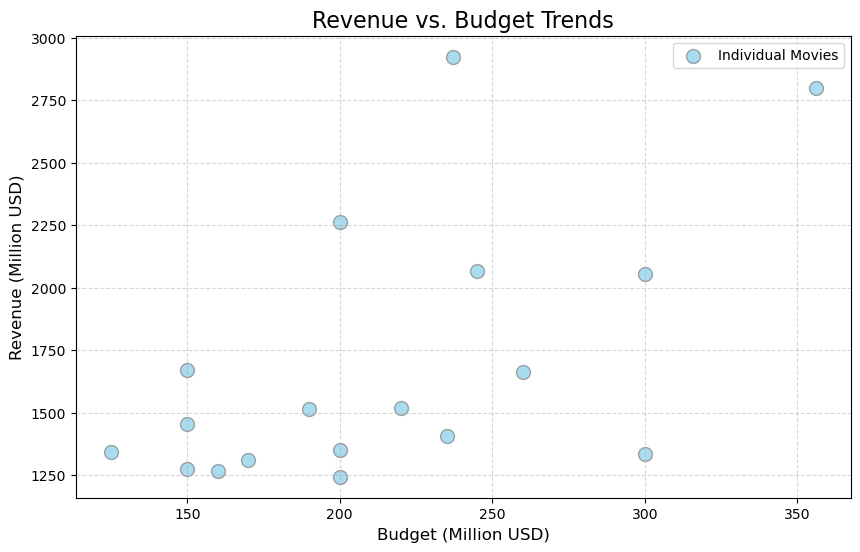

2025-12-15 17:29:43,875 - INFO - src.visualization - Generated Revenue vs. Budget scatter plot


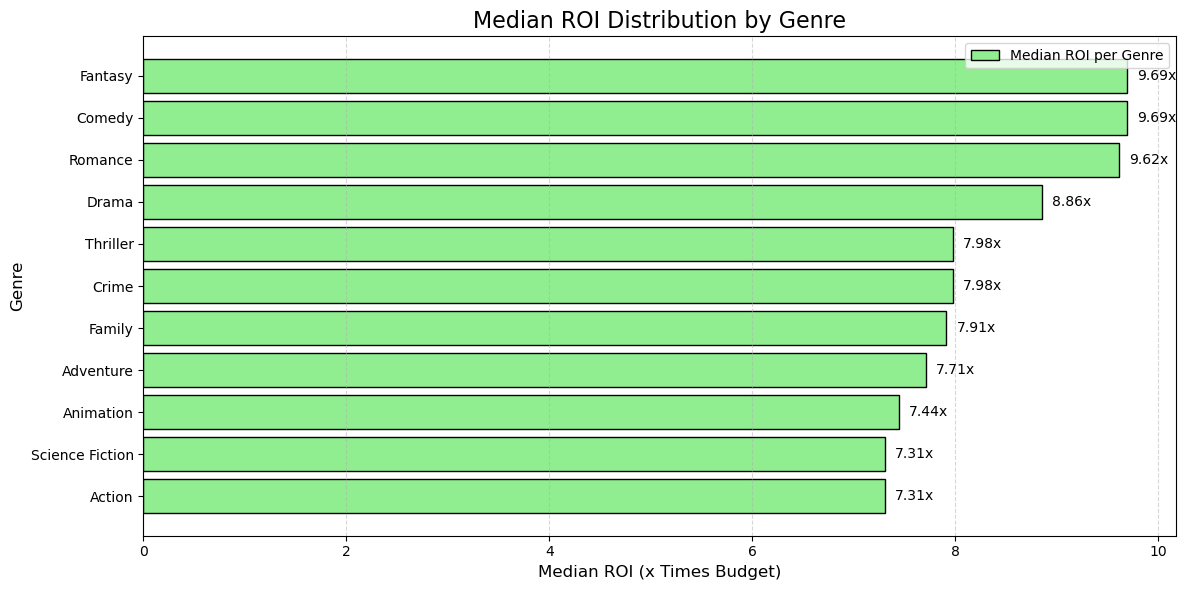

2025-12-15 17:29:44,593 - INFO - src.visualization - Generated ROI Distribution by Genre bar chart
2025-12-15 17:29:44,615 - INFO - src.visualization - Generated ROI Distribution by Genre bar chart


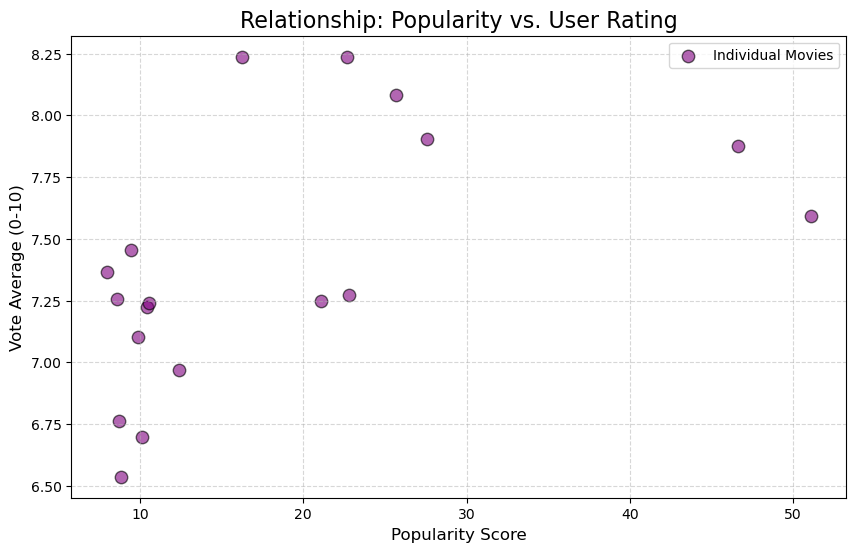

2025-12-15 17:29:45,286 - INFO - src.visualization - Generated Popularity vs. Rating scatter plot


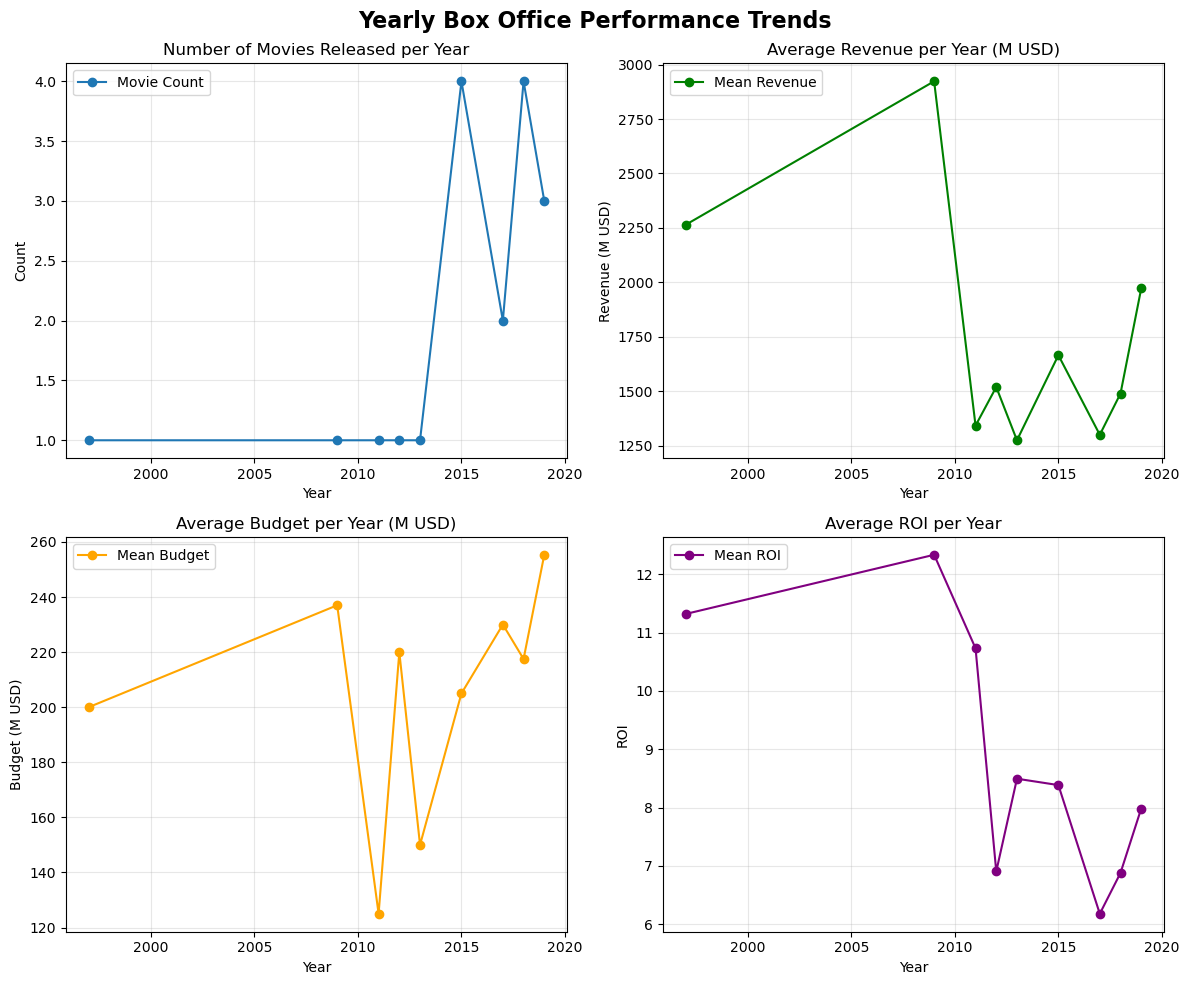

2025-12-15 17:29:48,065 - INFO - src.visualization - Generated Yearly Trends line chart


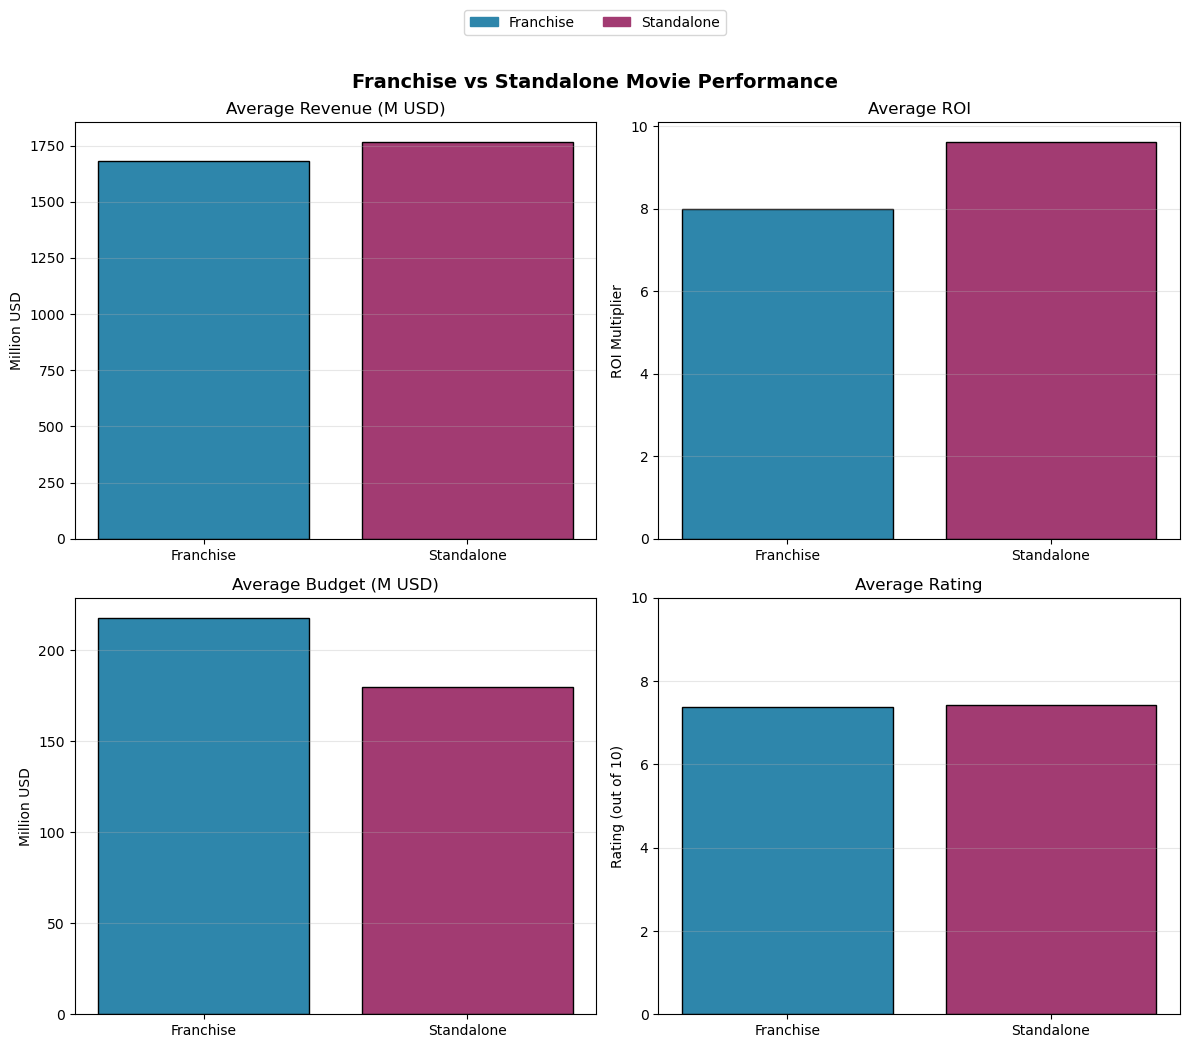

2025-12-15 17:29:49,843 - INFO - src.visualization - Generated Franchise vs. Standalone bar chart
2025-12-15 17:29:49,847 - INFO - src.visualization - visualization.py completed successfully in 6.60 seconds


ImportError: cannot import name 'visualization' from 'src.visualization' (c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\visualization.py)

In [ ]:
sys.path.append(os.path.abspath('..'))
from src.visualization import visualization

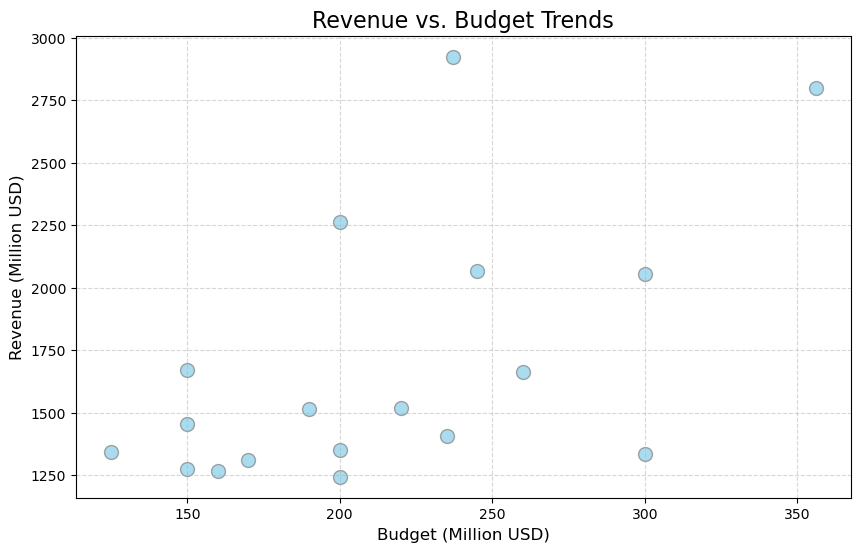

In [ ]:
# 1. Revenue vs. Budget Trends (Scatter Plot)
plt.figure(figsize=(10, 6))

# Plot Standalone 
plt.scatter(
    df_movie['budget_musd'],
    df_movie['revenue_musd'],
    color='skyblue',
    alpha=0.7,
    s=100,
    edgecolors='grey'
)
plt.title('Revenue vs. Budget Trends', fontsize=16)
plt.xlabel('Budget (Million USD)', fontsize=12)
plt.ylabel('Revenue (Million USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

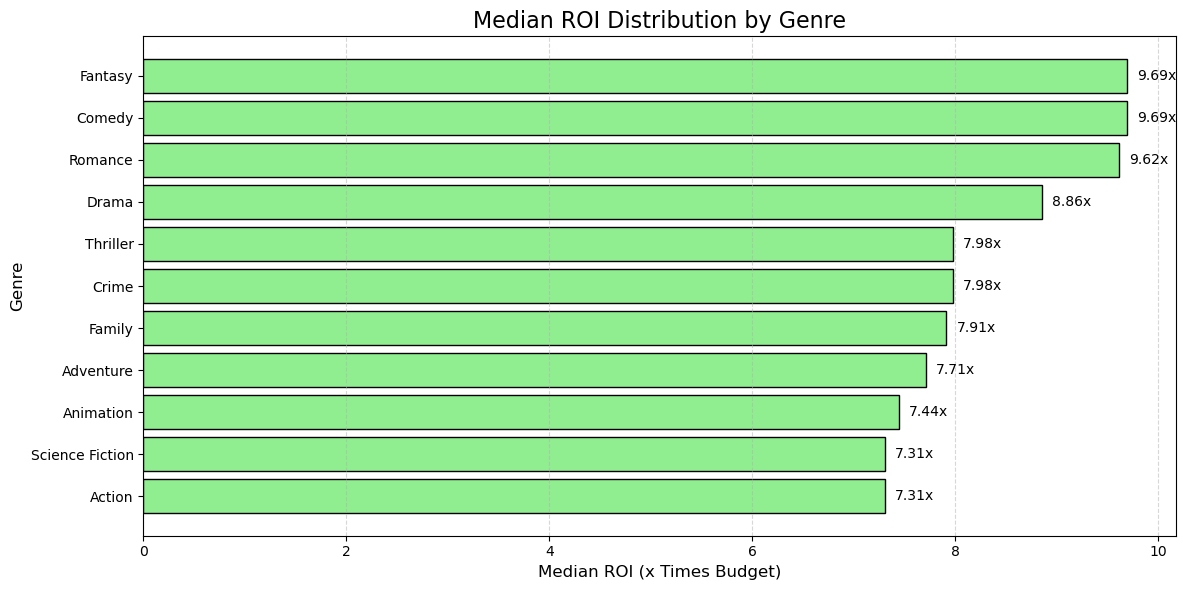

In [ ]:
# 2. ROI Distribution by Genre (Bar Chart)
plt.figure(figsize=(12, 6))

# Calculate Median ROI per genre and sort
genre_roi = df_exploded.groupby('genre_list')['roi'].median().sort_values()

# Plot Horizontal Bar Chart
bars = plt.barh(genre_roi.index, genre_roi.values,
                color='lightgreen', edgecolor='black')

plt.title('Median ROI Distribution by Genre', fontsize=16)
plt.xlabel('Median ROI (x Times Budget)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5, axis='x')

# Add Labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}x', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

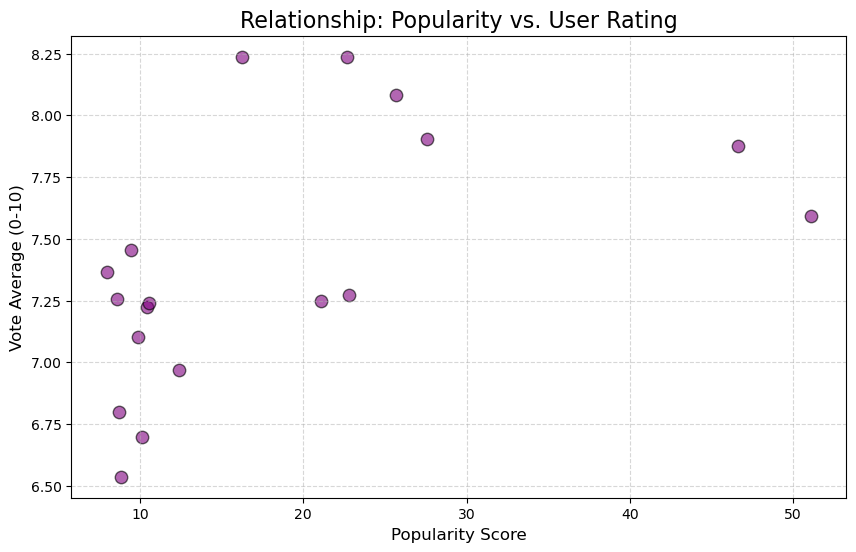

In [ ]:
# 3. Popularity vs. Rating (Scatter Plot)
plt.figure(figsize=(10, 6))

plt.scatter(
    df_movie['popularity'],
    df_movie['vote_average'],
    color='purple',
    alpha=0.6,
    edgecolors='black',
    s=80
)

plt.title('Relationship: Popularity vs. User Rating', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Vote Average (0-10)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

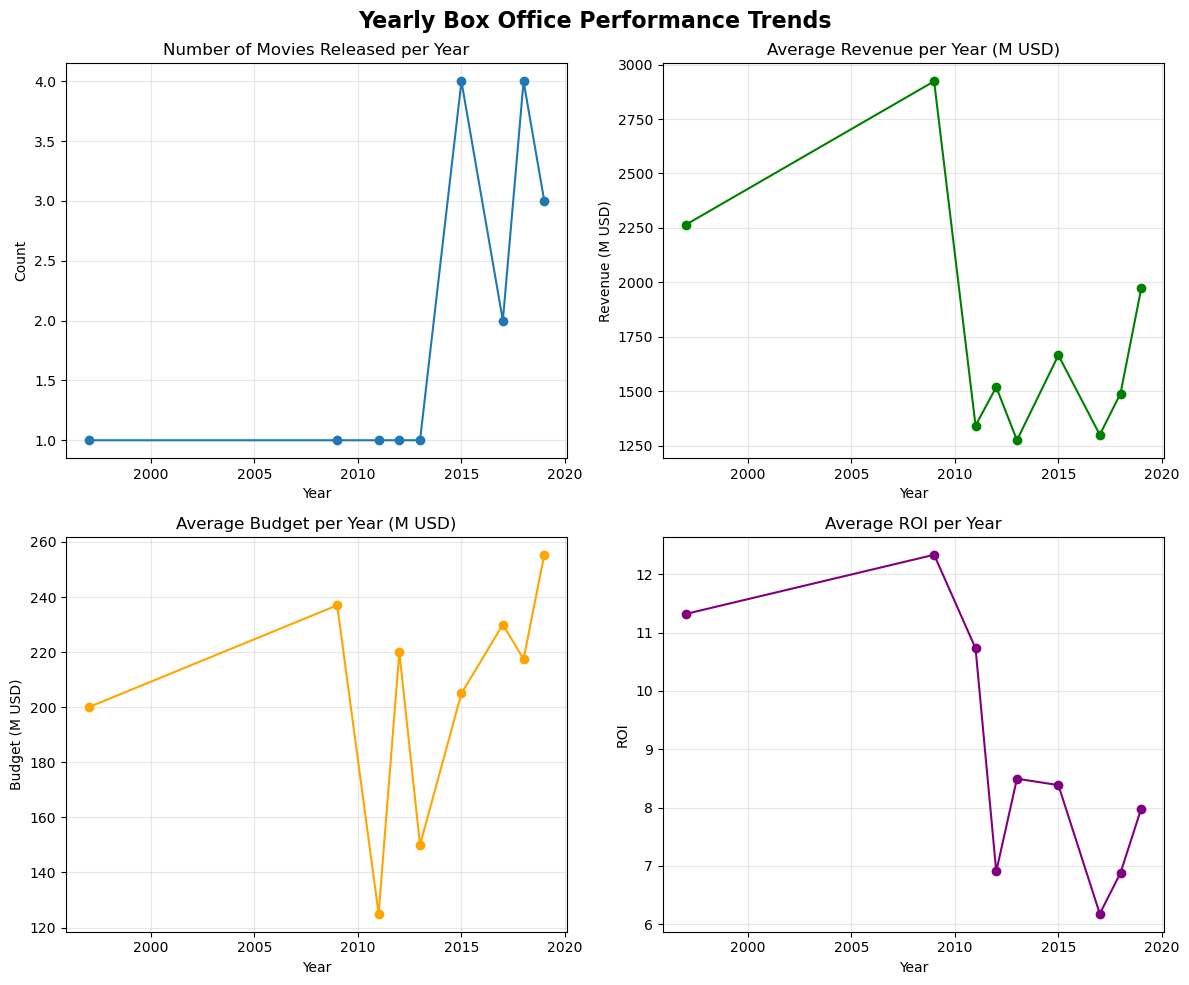

In [ ]:
# 4. Yearly Trends in Box Office Performance (Line Chart)
df_movie["release_year"] = df_movie["release_date"].dt.year

# Group by year and calculate metrics
yearly_stats = df_movie.groupby("release_year").agg(
    {"revenue_musd": ["count", "mean"], "budget_musd": "mean", "roi": "mean"}
)

yearly_stats.columns = ["Movie Count",
                        "Mean Revenue", "Mean Budget", "Mean ROI"]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Yearly Box Office Performance Trends",
             fontsize=16, fontweight="bold")

# Movie Count per Year
axs[0, 0].plot(yearly_stats.index, yearly_stats["Movie Count"], marker="o")
axs[0, 0].set_title("Number of Movies Released per Year")
axs[0, 0].set_ylabel("Count")

# Average Revenue per Year
axs[0, 1].plot(
    yearly_stats.index, yearly_stats["Mean Revenue"], marker="o", color="green"
)
axs[0, 1].set_title("Average Revenue per Year (M USD)")
axs[0, 1].set_ylabel("Revenue (M USD)")

# Average Budget per Year
axs[1, 0].plot(
    yearly_stats.index, yearly_stats["Mean Budget"], marker="o", color="orange"
)
axs[1, 0].set_title("Average Budget per Year (M USD)")
axs[1, 0].set_ylabel("Budget (M USD)")

# Average ROI per Year
axs[1, 1].plot(
    yearly_stats.index, yearly_stats["Mean ROI"], marker="o", color="purple"
)
axs[1, 1].set_title("Average ROI per Year")
axs[1, 1].set_ylabel("ROI")

for ax in axs.flat:
    ax.set_xlabel("Year")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

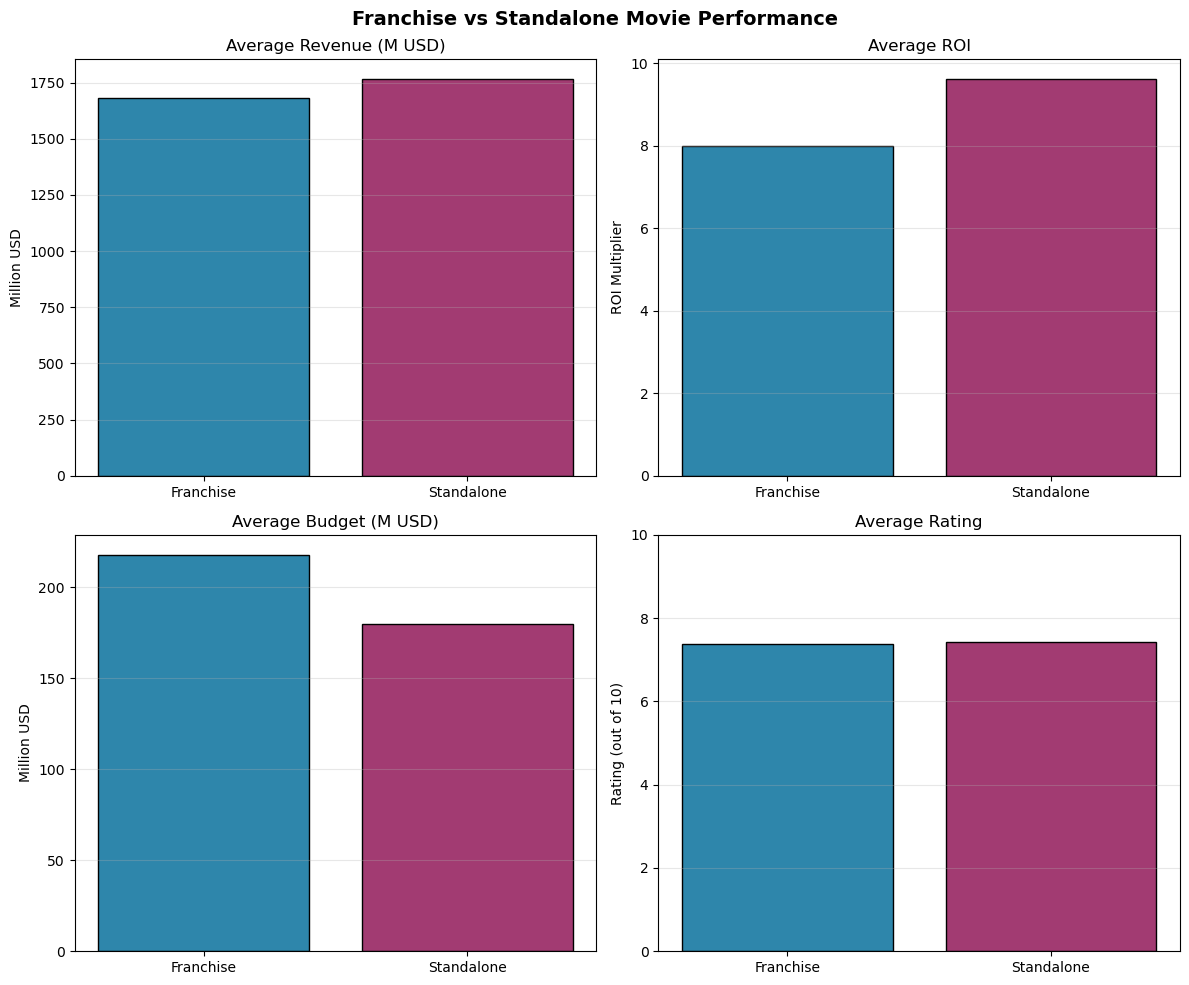

In [ ]:

# 5. Franchise vs. Standalone Success (Bar Chart)
franchise_stats = df_movie[df_movie["belongs_to_collection"].notna()]
standalone = df_movie[df_movie["belongs_to_collection"].isna()]

    # calculate metrics
metrics = {
        "Revenue": [
            franchise_stats["revenue_musd"].mean(),
            standalone["revenue_musd"].mean(),
        ],
        "ROI": [franchise_stats["roi"].mean(), standalone["roi"].mean()],
        "Budget": [franchise_stats["budget_musd"].mean(), standalone["budget_musd"].mean()],
        "Rating": [franchise_stats["vote_average"].mean(), standalone["vote_average"].mean()],
    }

    # Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle(
        "Franchise vs Standalone Movie Performance", fontsize=14, fontweight="bold"
    )

categories = ["Franchise", "Standalone"]
colors = ["#2E86AB", "#A23B72"]

    # Revenue comparison
axs[0, 0].bar(categories, metrics["Revenue"], color=colors, edgecolor="black")
axs[0, 0].set_title("Average Revenue (M USD)")
axs[0, 0].set_ylabel("Million USD")
axs[0, 0].grid(True, axis="y", alpha=0.3)

    # ROI comparison
axs[0, 1].bar(categories, metrics["ROI"], color=colors, edgecolor="black")
axs[0, 1].set_title("Average ROI")
axs[0, 1].set_ylabel("ROI Multiplier")
axs[0, 1].grid(True, axis="y", alpha=0.3)

    # Budget comparison
axs[1, 0].bar(categories, metrics["Budget"], color=colors, edgecolor="black")
axs[1, 0].set_title("Average Budget (M USD)")
axs[1, 0].set_ylabel("Million USD")
axs[1, 0].grid(True, axis="y", alpha=0.3)

    # Rating comparison
axs[1, 1].bar(categories, metrics["Rating"], color=colors, edgecolor="black")
axs[1, 1].set_title("Average Rating")
axs[1, 1].set_ylabel("Rating (out of 10)")
axs[1, 1].set_ylim(0, 10)
axs[1, 1].grid(True, axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


<!-- ### End of Step 4 -->
